In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
full_data = pd.read_csv("/content/messages.csv")

In [3]:
full_data

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [4]:
full_data['message'].str.lower()

0       content - length : 3386 apple-iss research cen...
1       lang classification grimes , joseph e . and ba...
2       i am posting this inquiry for sergei atamas ( ...
3       a colleague and i are researching the differin...
4       earlier this morning i was on the phone with a...
                              ...                        
2888    hello thanks for stopping by ! ! we have taken...
2889    the list owner of : " kiddin " has invited you...
2890    judging from the return post , i must have sou...
2891    gotcha ! there are two separate fallacies in t...
2892    hello ! i ' m working on a thesis concerning a...
Name: message, Length: 2893, dtype: object

In [5]:
full_data.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [6]:
full_data.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [7]:
full_data.fillna(full_data['subject'].mode().values[0], inplace = True)

In [8]:
full_data['sub_msge'] = full_data['subject']+ full_data['message']

In [9]:
full_data.head()

,subject,message,label,sub_msge
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j..."
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...


In [10]:
full_data['sub_msge'].describe()

count                                                  2893
unique                                                 2876
top       re := 20 the virtual girlfriend and virtual bo...
freq                                                      4
Name: sub_msge, dtype: object

In [11]:
full_data['length']= full_data['sub_msge'].apply(len)
full_data

,subject,message,label,sub_msge,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070
...,...,...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1,love your profile - ysuolvpvhello thanks for s...,290
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1,you have been asked to join kiddinthe list own...,2197
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0,anglicization of composers ' namesjudging from...,1073
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0,"re : 6 . 797 , comparative method : n - ary co...",3003


In [12]:
full_data.drop('subject' ,axis =1 , inplace = True)
full_data.head()

,message,label,sub_msge,length
0,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


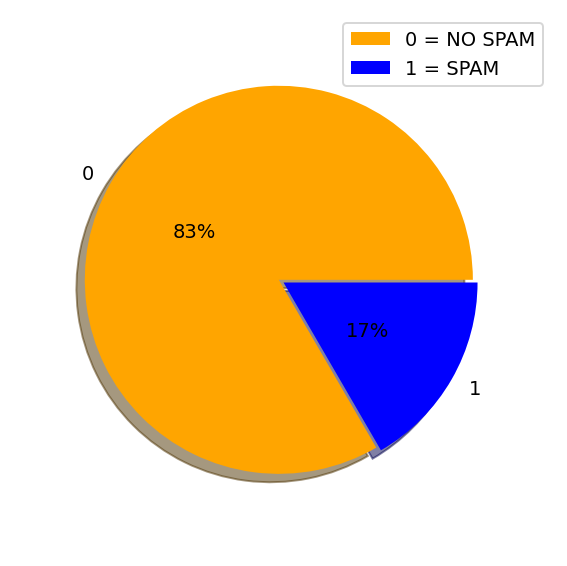

In [13]:
lb=full_data['label'].value_counts().index.tolist()
val=full_data['label'].value_counts().values.tolist()
exp=(0.025,0)
clr=('orange','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(["0 = NO SPAM",'1 = SPAM'])
plt.show()


In [14]:
full_data['message'][0]

"content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical language modeling ; text tokenization and

In [15]:
import re

def decontact(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
full_data['sub_msge']=full_data['sub_msge'].str.replace(r'\d+(\.\d+)?', 'numbers')
full_data['sub_msge'][0]

"job posting - apple-iss research centercontent - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical la

In [17]:
full_data['sub_msge']=full_data['sub_msge'].str.lower()

full_data['sub_msge']=full_data['sub_msge'].str.replace(r'\n'," ")

full_data['sub_msge']=full_data['sub_msge'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')

full_data['sub_msge']=full_data['sub_msge'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')

full_data['sub_msge']=full_data['sub_msge'].str.replace(r'£|\$', 'Money')

full_data['sub_msge']=full_data['sub_msge'].str.replace(r'\s+', ' ')

full_data['sub_msge']=full_data['sub_msge'].str.replace(r'^\s+|\s+?$', '')

full_data['sub_msge']=full_data['sub_msge'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')

full_data['sub_msge']=full_data['sub_msge'].str.replace(r"[^a-zA-Z0-9]+", " ")

In [18]:

full_data['message'] = full_data['message'].str.lower()

In [19]:

full_data['message'] = full_data['message'].str.replace(r'\n', ' ')


In [20]:

full_data['message'] = full_data['message'].str.replace(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', 'MailID' )



In [21]:

full_data['message'] = full_data['message'].str.replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 'Links')



In [22]:

full_data['message'] = full_data['message'].str.replace(r'£|\$', 'Money')



In [23]:
full_data['message'] = full_data['message'].str.replace(r'\s+', ' ')


In [24]:

full_data['message']=full_data['message'].str.replace(r'^\s+|\s+?$', '')

In [25]:

full_data['message']=full_data['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')

In [26]:

full_data['message']=full_data['message'].str.replace(r"[^a-zA-Z0-9]+", " ")

In [27]:
full_data['sub_msge'][0]

"job posting - apple-iss research centercontent - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical la

In [28]:
full_data.head()

,message,label,sub_msge,length
0,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


In [29]:
import nltk

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
# removing stopwords
stop = stopwords.words('english')
full_data['Cleaned_Text'] = full_data['sub_msge'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [32]:
full_data.head()

,message,label,sub_msge,length,Cleaned_Text
0,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895,job posting - apple-iss research centercontent...
1,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816,"sociolinguisticslang classification grimes , j..."
2,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485,query : letter frequencies text identification...
3,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328,riska colleague researching differing degrees ...
4,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070,request book informationearlier morning phone ...


In [33]:
full_data.drop(['message', 'sub_msge'], axis = 1 , inplace = True)

In [34]:
full_data.head()

,label,length,Cleaned_Text
0,0,2895,job posting - apple-iss research centercontent...
1,0,1816,"sociolinguisticslang classification grimes , j..."
2,0,1485,query : letter frequencies text identification...
3,0,328,riska colleague researching differing degrees ...
4,0,1070,request book informationearlier morning phone ...


In [35]:
full_data.isnull().sum()

label           0
length          0
Cleaned_Text    0
dtype: int64

In [36]:
full_data['L-Cleaned_Text']=  full_data['Cleaned_Text'].apply(len)
full_data.head()

,label,length,Cleaned_Text,L-Cleaned_Text
0,0,2895,job posting - apple-iss research centercontent...,2526
1,0,1816,"sociolinguisticslang classification grimes , j...",1587
2,0,1485,query : letter frequencies text identification...,1192
3,0,328,riska colleague researching differing degrees ...,226
4,0,1070,request book informationearlier morning phone ...,743


In [37]:
original_length = sum(full_data['length'])
after_cleaning = sum(full_data['L-Cleaned_Text'])

In [38]:
print("original length= ", original_length)
print("after cleaning = ", after_cleaning)

original length=  9437398
after cleaning =  7638916


 **GRADIENTBOOSTING CLASSIFIER**

In [39]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


X = full_data.Cleaned_Text
y = full_data.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


gb_clf = GradientBoostingClassifier()

gb_clf.fit(X_train_tfidf, y_train)


y_pred_train = gb_clf.predict(X_train_tfidf)
y_pred_test = gb_clf.predict(X_test_tfidf)


train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9995678478824547
Testing Accuracy: 0.9792746113989638


***RANDOM FOREST***

In [40]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have your data loaded into a DataFrame called full_data with columns 'label' and 'Clean_text'

# Split data into features (X) and target variable (y)
X = full_data.Cleaned_Text
y = full_data.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train_tfidf, y_train)

y_pred_train = rf_clf.predict(X_train_tfidf)
y_pred_test = rf_clf.predict(X_test_tfidf)


train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.9930915371329879


***Naive Byes***

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

X = full_data.Cleaned_Text
y = full_data.label

vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.2, random_state=42)


clf = MultinomialNB()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9930915371329879
